In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt



In [4]:

data = pd.read_excel("spam_dataset.xlsx")

print("Shape of data:", data.shape)
print(data.head())
print("\nMissing values:\n", data.isnull().sum())
X = data[['word_freq','msg_len']]
y = data['label']



Shape of data: (15, 3)
   word_freq  msg_len  label
0          9       95      1
1          8      110      1
2         10      105      1
3          7       90      1
4          2      160      0

Missing values:
 word_freq    0
msg_len      0
label        0
dtype: int64


In [5]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)




In [6]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nSVC [rbf] Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))




SVC [rbf] Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 2]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [7]:

model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nSVC [linear] Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))




SVC [linear] Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 2]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



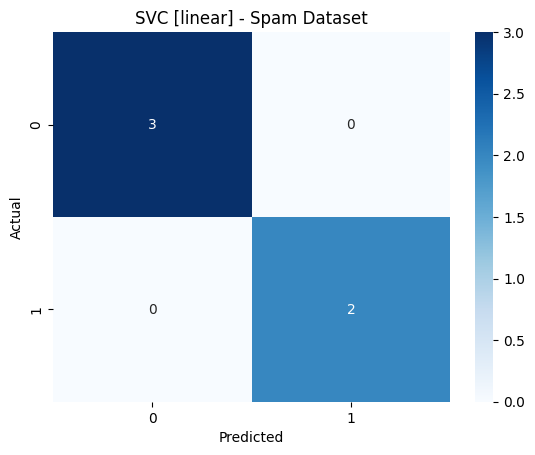

In [8]:

conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues')
plt.title('SVC [linear] - Spam Dataset')
plt.show()
